# Acoustic TimeStepping MLMC Experiments

In [44]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [45]:
import sys
sys.path.append('../..')
from python.mluqmppy import *
from matplotlib import gridspec

mpp = mppy.Mpp(
    project_name='MLUQ',
    executable='M++',
    build_dir='mpp/build-mlmc-acoustic-time-stepping',
    cmake_args=['-DMPP_BUILD_TYPE=MppRelease', '-DBUILD_UQ=On', '-DBUILD_UQ_TESTS=Off'],
    kernels=4,
    mute=False
)

mpp.build()


================ running cmake ================

-- Option:     SPACE_DIM= 2   (using cached value)
-- Option:     USE_FFTW= ON   (using cached value)
-- Option:     USE_SPACETIME= OFF   (using cached value)
-- Option:     USE_SPLITTED_COMMS= ON   (using cached value)
-- Option:     AFFINE_LINEAR_TRAFO= ON   (using cached value)
-- Option:     BUILD_TESTS= OFF   (using cached value)
-- Option:     BUILD_TUTORIAL= ON   (using cached value)
-- Option:     BUILD_MLUQ_TESTS= Off   (using cached value)
-- Sub option: BUILD_TUTORIAL_TESTS= ON   (using cached value)
-- Option:     MPP_BUILD_TYPE= MppRelease   (using cached value)
-- A library with LAPACK API found.
-- Checking for LAPACK LQ factorization: found
-- 
-- Tasmanian 7.6 (development): summary of build options
--  -D CMAKE_BUILD_TYPE:STRING=Debug
--  -D CMAKE_INSTALL_PREFIX:PATH=/usr/local
--  -D CMAKE_CXX_FLAGS:STRING=
--  -D BUILD_SHARED_LIBS=ON
--  -D Tasmanian_ENABLE_OPENMP:BOOL=TRUE
--  -D Tasmanian_ENABLE_BLAS:BOOL=ON
--  -D

0

In [34]:
import socket

print(socket.gethostname())

if socket.gethostname().find("niklas") != -1:
    epsilons = [0.2]
    test_level = 5
    test_samples = 2
    mpp.kernels = 4
    
elif socket.gethostname().find("runner") != -1:
    epsilons = [0.1, 0.05]
    test_level = 6
    test_samples = 2
    mpp.kernels = 16

else:
    epsilons = [0.1, 0.05, 0.025, 0.02, 0.015, 0.0125, 0.01, 0.0075]
    mpp.kernels = {6: 64, 7: 64}
    test_level = 7
    test_samples = 4
    
test_time_steps = list(map(int, np.linspace(0, 2 * 2**test_level, 5)))
test_time_steps[0] = 2

niklas-ThinkPad-T470p


In [35]:
# Todo move to tutorial
# "Problem": "GaussHatAndRicker2D"
#
#gs=gridspec.GridSpec(len(test_time_steps), 2)
#p = mpp.vtu_plot(figsize=(9, 16))
#    
#for index, ts in enumerate(test_time_steps):
#    p.ax1 = p.fig.add_subplot(gs[2 * index])
#    p.add_vtu("U.{}.0.{}.{}.vtu".format(test_level, 0, ts), vmin = -0.5, vmax = 0.5, ax=p.ax1)
#    p.ax2 = p.fig.add_subplot(gs[2 * index + 1])
#    p.add_vtu("U.{}.1.{}.{}.vtu".format(test_level, 0, int(ts / 2)), vmin = -0.5, vmax = 0.5, ax=p.ax2)
#    
#plt.savefig(abspath(join(mpp.dm.PROJECT_PY_DATA_DIR, 'GaussHatAndRicker2D.png')))
#plt.plot(mpp.data["t"][-1][:len(test_time_steps)], mpp.data["L1"][-1][:len(test_time_steps)])
#plt.plot(mpp.data["t"][-1][len(test_time_steps):], mpp.data["L1"][-1][len(test_time_steps):])

In [36]:
mpp.reset_data()
mpp.run(config="mlmc-acoustic-time-stepping", kwargs={"VtuPlot": 1, "Estimator": "MC", "Level": test_level, "Samples": test_samples, "epsilon": 0.0})
data = mpp.parse_log()


================ running  mpp ================

start program on 4 procs at Tue Jun 14 16:11:09 2022
Running on: niklas-ThinkPad-T470p
   Config Info:
     Samples: ................................. 2
     Level: ................................... 5
     VtuPlot: ................................. 1
     PDESolverVerbose: ........................ 1
     LinearVerbose: ........................... 0
     ConfigVerbose: ........................... 1
     MLMCVerbose: ............................. 1
     Model: ................................... DGAcoustic
     AssembleVerbose: ......................... 16
     degree: .................................. 1
     Problem: ................................. StochasticGaussHatAndRicker2D
     epsilon: ................................. 0.0
     MeshVerbose: ............................. 0
     Estimator: ............................... MC
     Distribution: ............................ RCB
     initLevels: .............................. [4, 5, 

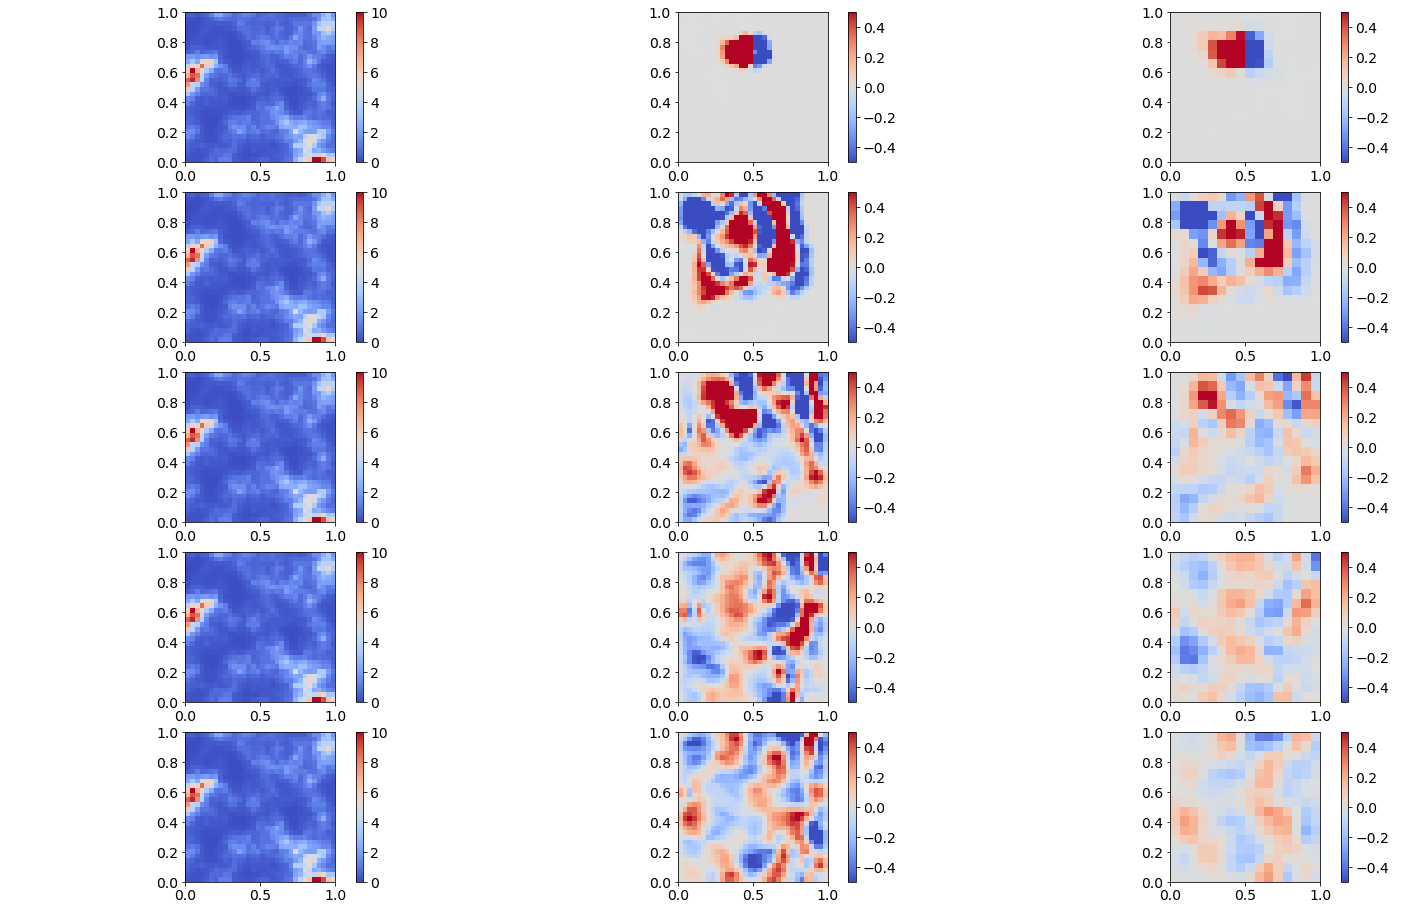

In [38]:
gs = gridspec.GridSpec(len(test_time_steps), int(1.5 * test_samples))
p = mpp.vtu_plot(figsize=(25, 16))

for index_row, ts in enumerate(test_time_steps):
    for sample in range(0, test_samples, 2):
        p.ax0 = p.fig.add_subplot(gs[int(1.5 * sample) + index_row * int(1.5 * test_samples)])
        p.add_vtu("Params.StochasticGaussHatAndRicker2D.{}.0.{}.vtu".format(test_level, sample), vmin = 0.0, vmax = 10, ax=p.ax0)
        p.ax1 = p.fig.add_subplot(gs[int(1.5 * sample) + 1 + index_row * int(1.5 * test_samples)])
        p.add_vtu("StochasticGaussHatAndRicker2D.{}.0.{}.{}.vtu".format(test_level, sample, ts), vmin = -0.5, vmax = 0.5, ax=p.ax1)
        p.ax2 = p.fig.add_subplot(gs[int(1.5 * sample) + 2 + index_row * int(1.5 * test_samples)])
        p.add_vtu("StochasticGaussHatAndRicker2D.{}.1.{}.{}.vtu".format(test_level, sample, int(ts / 2)), vmin = -0.5, vmax = 0.5, ax=p.ax2)
        
plt.savefig(abspath(join(mpp.dm.PROJECT_PY_DATA_DIR, 'StochasticGaussHatAndRicker2D.png')))

### Parallel vs Seriell

In [40]:
mpp.reset_data()

for parallel in [0, 1]:
    mpp.run(config="mlmc-acoustic-time-stepping", kwargs={"epsilon": 0.015, "ParallelEstimator": parallel, "Quantity": "L1"})
    mpp.parse_log()

convergence_plot(mpp)
cost_plot(mpp)


================ running  mpp ================

start program on 4 procs at Tue Jun 14 16:12:26 2022
Running on: niklas-ThinkPad-T470p
   Config Info:
     VtuPlot: ................................. 1
     PDESolverVerbose: ........................ 1
     LinearVerbose: ........................... 0
     ConfigVerbose: ........................... 1
     MLMCVerbose: ............................. 1
     Model: ................................... DGAcoustic
     AssembleVerbose: ......................... 16
     degree: .................................. 1
     Problem: ................................. StochasticGaussHatAndRicker2D
     epsilon: ................................. 0.015
     MeshVerbose: ............................. 0
     Estimator: ............................... MultilevelMonteCarlo
     Distribution: ............................ RCB
     initLevels: .............................. [4, 5, 6]
     NewtonVerbose: ........................... 0
     MeshesVerbose: .......

           TI: n=16    t=0.5           Energy=0.32861478    MaxP=0.23550826    MinP=-0.10022639   L1=0.15027604    L2=0.06046785    
           TI: n=32    t=1             Energy=0.2015601     MaxP=0.3097219     MinP=-0.24078558   L1=0.18211935    L2=0.078046943   
           TI:  0.39 seconds
         SMC4: StochasticGaussHatAndRicker2D.4.0.10 Q=0.18211935 C=0.38090659 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.10295565, 8.5852372] ----- Kappa€[1, 1] ----- Velocity€[0.34129022, 3.1165558]
           TI: n=0     t=0             Energy=0             MaxP=0             MinP=0             L1=0             L2=0             
           TI: n=16    t=0.5           Energy=0.34380919    MaxP=0.1643807     MinP=-0.018241961  L1=0.090186093   L2=0.031001543   
           TI: n=32    t=1             Energy=0.20085121    MaxP=0.32406924    MinP=-0.41873071   L1=0.19394327    L2=0.091078324   
           TI:  0.38 seconds
         SMC4: StochasticGaussHa

           TI: n=32    t=1             Energy=0.16907658    MaxP=0.037257409   MinP=-0.13454221   L1=0.11406904    L2=0.031649281   
           TI:  0.38 seconds
         SMC5: StochasticGaussHatAndRicker2D.5.1.2 Q=0.11406904 C=0.37322372 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.12528683, 20.656696] ----- Kappa€[1, 1] ----- Velocity€[0.22002376, 2.8251875]
           TI: n=0     t=0             Energy=0             MaxP=0             MinP=0             L1=0             L2=0             
           TI: n=16    t=0.25          Energy=0.40667176    MaxP=4.8697934e-05 MinP=-0.00014352292 L1=0.00087901444 L2=8.8891553e-06 
           TI: n=32    t=0.5           Energy=0.38563782    MaxP=0.15422719    MinP=-0.013969098  L1=0.063417622   L2=0.019750341   
           TI: n=48    t=0.75          Energy=0.37520243    MaxP=0.27106736    MinP=-0.17106935   L1=0.1386849     L2=0.050949285   
           TI: n=64    t=1             Energy=0.36617579    M

           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.039429416, 10.245615] ----- Kappa€[1, 1] ----- Velocity€[0.31241436, 5.0360476]
           TI: n=0     t=0             Energy=0             MaxP=0             MinP=0             L1=0             L2=0             
           TI: n=16    t=0.125         Energy=1.1122352     MaxP=2.5450303e-06 MinP=-2.9662686e-07 L1=0.00016858087 L2=2.9673682e-07 
           TI: n=32    t=0.25          Energy=1.0220384     MaxP=0.34712889    MinP=-0.01505044   L1=0.097044809   L2=0.066041311   
           TI: n=48    t=0.375         Energy=0.93721876    MaxP=0.81259871    MinP=-0.78008416   L1=0.24835553    L2=0.20030332    
           TI: n=64    t=0.5           Energy=0.86769747    MaxP=0.78027632    MinP=-1.0252367    L1=0.20159058    L2=0.12542341    
           TI: n=80    t=0.625         Energy=0.8186935     MaxP=0.85303495    MinP=-1.144631     L1=0.23068842    L2=0.13952098    
           TI: n=96    t=0.75        

           TI: n=112   t=0.875         Energy=0.74383074    MaxP=1.5747935     MinP=-1.6726873    L1=0.37762372    L2=0.35858824    
           TI: n=128   t=1             Energy=0.71790979    MaxP=1.8306458     MinP=-1.5596419    L1=0.33884771    L2=0.27735416    
           TI: 32.80 seconds
         SMC6: StochasticGaussHatAndRicker2D.6.0.3 Q=0.33884771 C=32.815359 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.062630273, 17.793569] ----- Kappa€[1, 1] ----- Velocity€[0.23706556, 3.9958378]
           TI: n=0     t=0             Energy=0             MaxP=0             MinP=0             L1=0             L2=0             
           TI: n=16    t=0.25          Energy=0.74908863    MaxP=1.607455e-05  MinP=-4.0301616e-05 L1=0.00082593224 L2=4.2529224e-06 
           TI: n=32    t=0.5           Energy=0.60035946    MaxP=0.56939423    MinP=-0.04278898   L1=0.13725172    L2=0.080637078   
           TI: n=48    t=0.75          Energy=0.4974179     M

           TI: n=16    t=0.5           Energy=0.32861478    MaxP=0.23550826    MinP=-0.10022639   L1=0.15027604    L2=0.06046785    
           TI: n=32    t=1             Energy=0.2015601     MaxP=0.3097219     MinP=-0.24078558   L1=0.18211935    L2=0.078046943   
           TI:  0.53 seconds
         SMC4: StochasticGaussHatAndRicker2D.4.0.26 Q=0.18211935 C=0.5221497 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.10295565, 8.5852372] ----- Kappa€[1, 1] ----- Velocity€[0.34129022, 3.1165558]
           TI: n=0     t=0             Energy=0             MaxP=0             MinP=0             L1=0             L2=0             
           TI: n=16    t=0.5           Energy=0.34380919    MaxP=0.1643807     MinP=-0.018241961  L1=0.090186093   L2=0.031001543   
           TI: n=32    t=1             Energy=0.20085121    MaxP=0.32406924    MinP=-0.41873071   L1=0.19394327    L2=0.091078324   
           TI:  0.52 seconds
         SMC4: StochasticGaussHat

           TI: n=32    t=1             Energy=0.17882674    MaxP=0.2201751     MinP=-0.090702486  L1=0.13378369    L2=0.045934011   
           TI:  0.49 seconds
         SMC4: StochasticGaussHatAndRicker2D.4.0.38 Q=0.13378369 C=0.48905283 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.029848235, 5.0306435] ----- Kappa€[1, 1] ----- Velocity€[0.44584944, 5.788162]
           TI: n=0     t=0             Energy=0             MaxP=0             MinP=0             L1=0             L2=0             
           TI: n=16    t=0.5           Energy=0.33952866    MaxP=0.21005552    MinP=-0.13550254   L1=0.17481957    L2=0.076427447   
           TI: n=32    t=1             Energy=0.26352912    MaxP=0.36242621    MinP=-0.19103057   L1=0.18512477    L2=0.086468925   
           TI:  0.72 seconds
         SMC4: StochasticGaussHatAndRicker2D.4.0.39 Q=0.18512477 C=0.7139292 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.

           TI: n=16    t=0.5           Energy=0.26556945    MaxP=0.21267378    MinP=-0.3382802    L1=0.15721975    L2=0.066189062   
           TI: n=32    t=1             Energy=0.14678582    MaxP=0.15022836    MinP=-0.20673858   L1=0.12246781    L2=0.040385701   
           TI:  0.54 seconds
         SMC4: StochasticGaussHatAndRicker2D.4.0.51 Q=0.12246781 C=0.53647847 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.061789048, 6.3506404] ----- Kappa€[1, 1] ----- Velocity€[0.39681789, 4.0229464]
           TI: n=0     t=0             Energy=0             MaxP=0             MinP=0             L1=0             L2=0             
           TI: n=16    t=0.5           Energy=0.23156861    MaxP=0.1585649     MinP=-0.12650098   L1=0.17197895    L2=0.070759875   
           TI: n=32    t=1             Energy=0.16769651    MaxP=0.19345036    MinP=-0.10582694   L1=0.11704725    L2=0.033643821   
           TI:  0.53 seconds
         SMC4: StochasticGaussH

           TI: n=32    t=1             Energy=0.229797      MaxP=0.28965055    MinP=-0.1607257    L1=0.16561233    L2=0.069184081   
           TI:  0.50 seconds
         SMC4: StochasticGaussHatAndRicker2D.4.0.63 Q=0.16561233 C=0.49269499 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.19089748, 11.553586] ----- Kappa€[1, 1] ----- Velocity€[0.29419927, 2.2887581]
           TI: n=0     t=0             Energy=0             MaxP=0             MinP=0             L1=0             L2=0             
           TI: n=16    t=0.5           Energy=0.26331162    MaxP=0.19468242    MinP=-0.01521937   L1=0.10179946    L2=0.034725569   
           TI: n=32    t=1             Energy=0.16967206    MaxP=0.22516152    MinP=-0.17683777   L1=0.12392527    L2=0.040239422   
           TI:  0.47 seconds
         SMC4: StochasticGaussHatAndRicker2D.4.0.64 Q=0.12392527 C=0.46863879 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0

           TI: n=16    t=0.5           Energy=0.32459835    MaxP=0.20545006    MinP=-0.06667179   L1=0.10244767    L2=0.034854355   
           TI: n=32    t=1             Energy=0.22499111    MaxP=0.67386856    MinP=-0.46770773   L1=0.19598265    L2=0.10284461    
           TI:  0.66 seconds
         SMC4: StochasticGaussHatAndRicker2D.4.0.76 Q=0.19598265 C=0.65596235 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.057170671, 29.502426] ----- Kappa€[1, 1] ----- Velocity€[0.18410735, 4.1822824]
           TI: n=0     t=0             Energy=0             MaxP=0             MinP=0             L1=0             L2=0             
           TI: n=16    t=0.5           Energy=0.2883562     MaxP=0.003371346   MinP=-0.0033471507 L1=0.014703746   L2=0.00078189073 
           TI: n=32    t=1             Energy=0.20480057    MaxP=0.19713866    MinP=-0.1637371    L1=0.13211913    L2=0.045487874   
           TI:  0.55 seconds
         SMC4: StochasticGaussH

           TI: n=32    t=1             Energy=0.21913855    MaxP=0.39087581    MinP=-0.24295672   L1=0.14624042    L2=0.056372622   
           TI:  0.53 seconds
         SMC4: StochasticGaussHatAndRicker2D.4.0.88 Q=0.14624042 C=0.52404906 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.058717522, 12.599083] ----- Kappa€[1, 1] ----- Velocity€[0.28172834, 4.1268258]
           TI: n=0     t=0             Energy=0             MaxP=0             MinP=0             L1=0             L2=0             
           TI: n=16    t=0.5           Energy=0.18566651    MaxP=0.14771956    MinP=-0.17753235   L1=0.15151672    L2=0.058703505   
           TI: n=32    t=1             Energy=0.10353751    MaxP=0.056697774   MinP=-0.12108249   L1=0.1136735     L2=0.033421882   
           TI:  0.55 seconds
         SMC4: StochasticGaussHatAndRicker2D.4.0.89 Q=0.1136735 C=0.54785297 W=1
         SMC4: 41.80 seconds
         SMC5: M=8 dM=13 dMComm=13
           TI: Star

           TI: n=16    t=0.5           Energy=0.18343723    MaxP=0.12019713    MinP=-0.17765195   L1=0.12417796    L2=0.038246306   
           TI: n=32    t=1             Energy=0.11427764    MaxP=0.13651894    MinP=-0.14685925   L1=0.1024249     L2=0.029195478   
           TI:  0.64 seconds
         SMC5: StochasticGaussHatAndRicker2D.5.1.12 Q=0.1024249 C=0.63522849 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.094169736, 9.4509424] ----- Kappa€[1, 1] ----- Velocity€[0.3252838, 3.2586996]
           TI: n=0     t=0             Energy=0             MaxP=0             MinP=0             L1=0             L2=0             
           TI: n=16    t=0.25          Energy=0.70598323    MaxP=8.6859722e-06 MinP=-3.9452839e-06 L1=0.00045455971 L2=1.1675917e-06 
           TI: n=32    t=0.5           Energy=0.56789525    MaxP=0.23172195    MinP=-0.04786806   L1=0.10590815    L2=0.043386082   
           TI: n=48    t=0.75          Energy=0.49230645    M

           TI: n=16    t=0.25          Energy=0.63205365    MaxP=6.2281742e-05 MinP=-0.001499164  L1=0.0048858362  L2=0.00015897269 
           TI: n=32    t=0.5           Energy=0.50868645    MaxP=0.33400153    MinP=-0.33249824   L1=0.18688465    L2=0.097026925   
           TI: n=48    t=0.75          Energy=0.45006293    MaxP=0.42714332    MinP=-0.48337774   L1=0.18613602    L2=0.081623151   
           TI: n=64    t=1             Energy=0.39433786    MaxP=0.33827478    MinP=-0.25318744   L1=0.16278038    L2=0.064201171   
           TI:  3.18 seconds
         SMC5: StochasticGaussHatAndRicker2D.5.0.18 Q=0.16278038 C=3.1814 W=1
           TI: Starting DiagonalImplicitRungeKutta3 (Order=3)
           TI: Rho€[0.068495167, 7.1419545] ----- Kappa€[1, 1] ----- Velocity€[0.37418938, 3.8209384]
           TI: n=0     t=0             Energy=0             MaxP=0             MinP=0             L1=0             L2=0             
           TI: n=16    t=0.5           Energy=0.26946592    MaxP

KeyboardInterrupt: 

# Main Experiment - L1

In [43]:
mpp.reset_data()

for epsilon in epsilons:
    mpp.run(config="mlmc-acoustic-time-stepping", kwargs={"Quantity": "L1", "AssembleVerbose": 0})
    mpp.parse_log()

convergence_plot(mpp, label="Epsilon")
cost_plot(mpp, label="Epsilon")

if 0.0 not in mpp.data['Epsilon']:
    value_error_plot(mpp)
    mlmc_plot(mpp)


================ running  mpp ================

start program on 4 procs at Tue Jun 14 16:25:45 2022
Running on: niklas-ThinkPad-T470p
   Config Info:
     VtuPlot: ................................. 1
     PDESolverVerbose: ........................ 1
     LinearVerbose: ........................... 0
     ConfigVerbose: ........................... 1
     MLMCVerbose: ............................. 1
     MainVerbose: ............................. 1
     MCVerbose: ............................... 1
     Model: ................................... DGAcoustic
     AssembleVerbose: ......................... 0
     degree: .................................. 1
     Problem: ................................. StochasticGaussHatAndRicker2D
     epsilon: ................................. 0.1
     MeshVerbose: ............................. 0
     Estimator: ............................... MultilevelMonteCarlo
     Distribution: ............................ RCB
     initLevels: .....................

KeyboardInterrupt: 

# Main Experiment - L2

In [83]:
for epsilon in epsilons:
    mpp.run(config="mlmc-acoustic-time-stepping", kwargs={"epsilon": epsilon, "Quantity": "L2", "AssembleVerbose": 0, "logfile": "log/{}+{}".format("L2", epsilon)})


================ running  mpp ================

start program on 4 procs at Wed Feb  9 10:19:48 2022
Running on: niklas-ThinkPad-T470p
   Config Info:
     logfile: ................................. log/L2+0.2
     PDESolverVerbose: ........................ 1
     LinearVerbose: ........................... 0
     ConfigVerbose: ........................... 1
     PDESolverPlotting: ....................... 0
     MLMCVerbose: ............................. 1
     Model: ................................... DGAcoustic
     AssembleVerbose: ......................... 0
     degree: .................................. 1
     Problem: ................................. StochasticGaussHatAndRicker2D
     epsilon: ................................. 0.2
     MeshVerbose: ............................. 0
     Estimator: ............................... MultilevelMonteCarlo
     Distribution: ............................ RCB
     initLevels: .............................. [4, 5, 6]
     NewtonVerbose: .

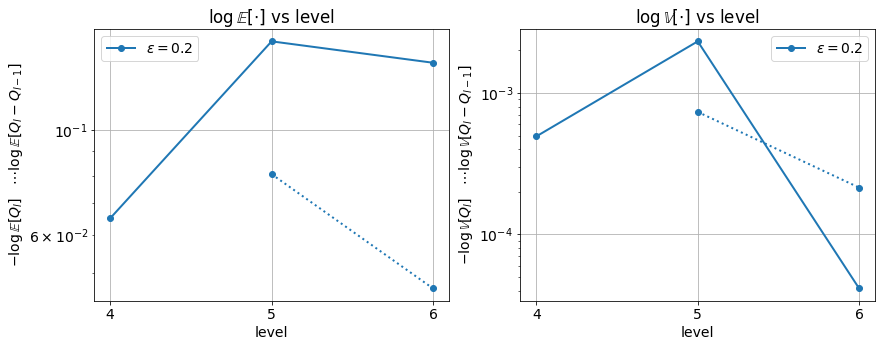

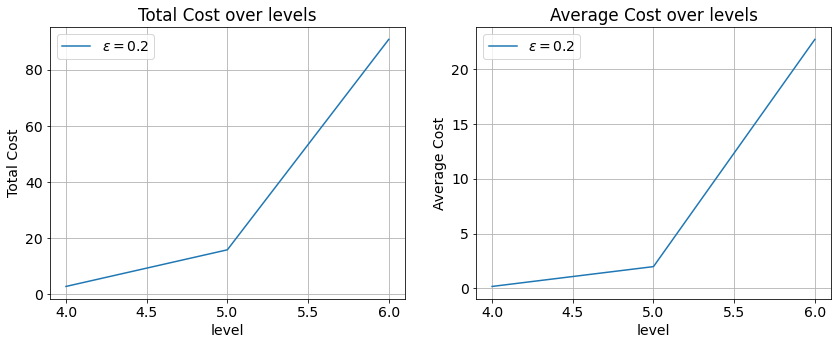

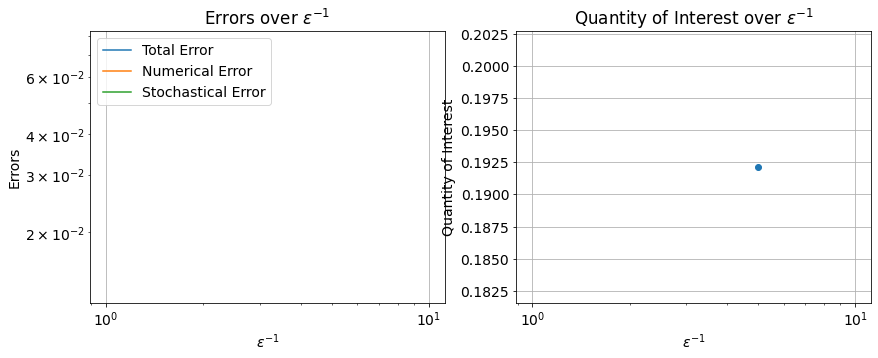

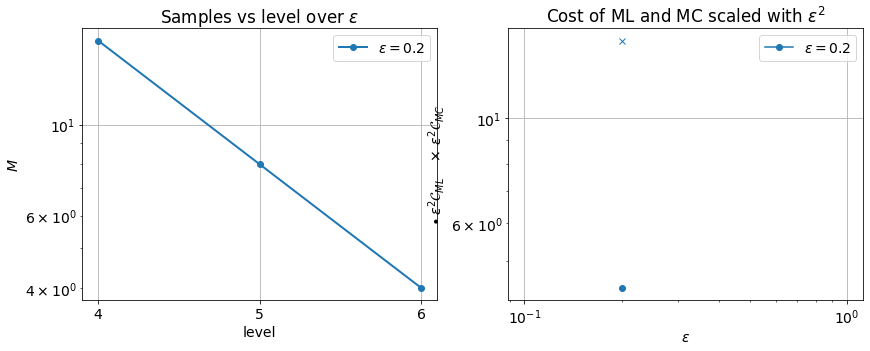

In [5]:
import os
mpp.reset_data()
for file in os.listdir(mpp.dm.PROJECT_LOG_DIR):
    if file.find("L2") != -1:
        mpp.parse_log(abspath(join(mpp.dm.PROJECT_LOG_DIR, file)))

convergence_plot(mpp, label="Epsilon")
cost_plot(mpp, label="Epsilon")
value_error_plot(mpp)
mlmc_plot(mpp)